# Regression in Scikit-learn

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# other 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
# import dataset
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
df_linear=df[['age','fare']]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [34]:
# simple linear regression
x=df[['age']]
y=df['fare']

In [35]:
x.isnull().sum()/len(x)*100 # percentage null values of x column

age    19.86532
dtype: float64

In [36]:
y.isnull().sum()/len(y)*100 # percentage null values of y column

0.0

In [37]:
# filling the missing values of x column
df_linear['age'].fillna(df_linear['age'].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5880\2756021984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear['age'].fillna(df_linear['age'].mean(), inplace=True)


In [38]:
df_linear.isnull().sum() # null values of x column

age     0
fare    0
dtype: int64

In [39]:
x.shape

(891, 1)

In [40]:
y.shape

(891,)

- shape of x and y is equal (891)

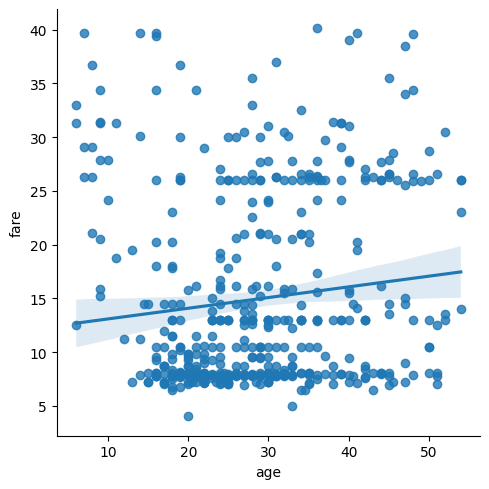

In [55]:
# plot
sns.lmplot(data=df_linear, x='age', y='fare')

<Axes: ylabel='age'>

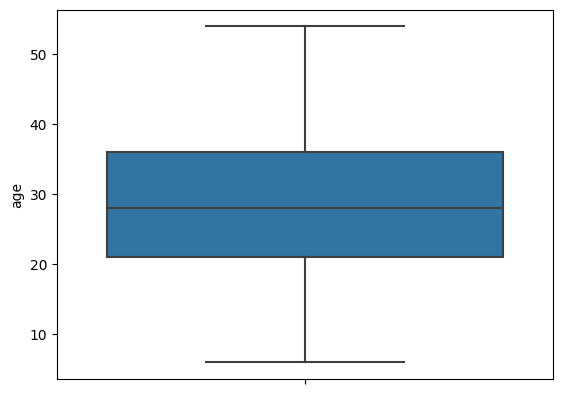

In [44]:
sns.boxplot(data=df_linear, y='age')

In [43]:
df_linear=df_linear[(df['age']>5) & (df_linear['age']<55)] # Removing outliers of age column

<Axes: ylabel='fare'>

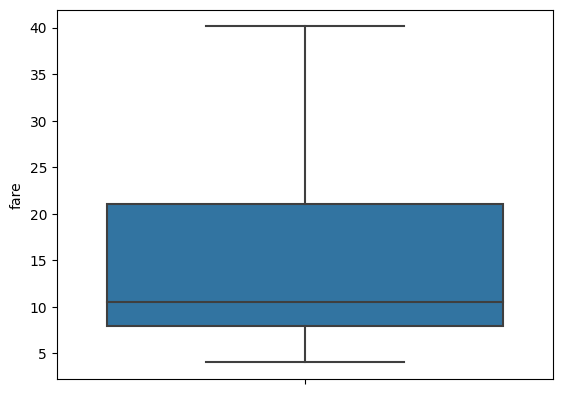

In [53]:
# BOXPLOT OF fare
sns.boxplot(data=df_linear,y='fare')

In [50]:
df_linear=df_linear[(df_linear['fare']>1) & (df_linear['fare']<42)] # Removing outliers of fare column

In [52]:
# IQR(Inter-Quartile Range) Method
#Removing outliers of "fare" column
Q1= df_linear['fare'].quantile(0.25)
Q3= df_linear['fare'].quantile(0.75)
IQR= Q3-Q1
IQR
  # Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
df_linear=df_linear[(df_linear['fare'] > lower_bound) & (df_linear['fare'] < upper_bound)]    

In [57]:
X=df_linear[['age']]
y=df_linear['fare']

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Call the model
model=LinearRegression()

# Train the model
model.fit(X,y)

# Now we will predict the model,, by giving it X value(X is age) we will predict y value(y is fare)
model.predict([[60]])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.05129869])

In [67]:
# Model evaluation with matrics
# r2
# mean-squared error
# MAE
# RMSE

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

#model
model=LinearRegression()

# train
model.fit(X_train, y_train)

# Prediction
predictions=model.predict(X_test)

<Axes: xlabel='fare'>

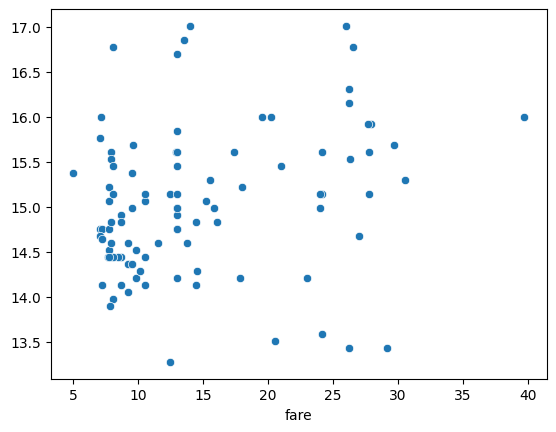

In [70]:
# Compare
sns.scatterplot(x=y_test, y=predictions)

In [72]:
# score (score is Accuracy)
Accuracy=model.score(X_test, y_test)
print('Accuracy: ', Accuracy)

Accuracy:  0.03792565939852666


In [77]:
# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MAE=mean_absolute_error(y_true=y_test, y_pred=predictions)
MSE=mean_squared_error(y_true=y_test, y_pred=predictions)
RMSE=mean_squared_error(y_true=y_test, y_pred=predictions, squared=False)
R2=r2_score(y_true=y_test, y_pred=predictions)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("R_Squared: ", R2)


MAE:  6.200314596835073
MSE:  54.21577120908454
RMSE:  7.363135962963372
R_Squared:  0.03792565939852666


In [78]:
#RMSE with numpy
import numpy as np
RMSE=np.sqrt(MSE)
RMSE

7.363135962963372

___
## June 26, 2023